# TMA4135 Exercise 4:
### Author: Simen Kristiansen Sandhaug 
---

## Table of Contents
- [Problem 1](#1a)
- [Problem 2](#2a)
- [Problem 3](#3a)
- [Problem 4](#4a)

---

## 1a)

Plotting $f(x) = (1-3^{x})x^2+4(x-1)3^x+4(1-x).$

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import cos, sin, pi, sqrt, exp, log

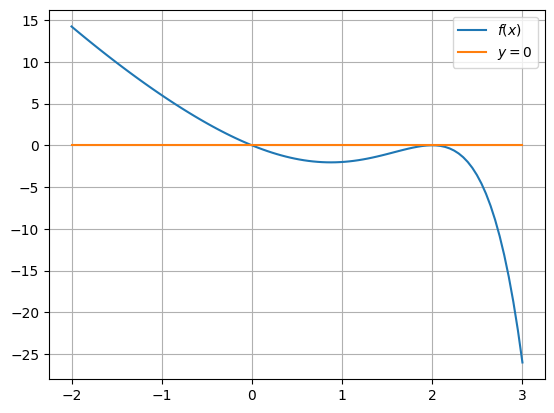

In [98]:
def f(x):
    return (1-3**x)*x**2 + 4*(x-1)*3**x + 4*(1-x)

interval = np.linspace(-2, 3, 100)

plt.plot(interval, f(interval), label='$f(x)$')
plt.plot(interval, 0*interval, label='$y=0$')
plt.legend()
plt.grid()
plt.show()

## 1d)

Consider the function
\begin{align}
    f(x)=(1-3^x)x^2+4(x-1)3^x+4(1-x),
\end{align}
we want to find all roots of $f(x)$ on the interval $[-2,3]$.

k=  0, a=-2.000000, b=3.000000, c=  0.500000, f(c)=-1.647e+00
k=  1, a=-2.000000, b=0.500000, c= -0.750000, f(c)= 4.245e+00
k=  2, a=-0.750000, b=0.500000, c= -0.125000, f(c)= 5.794e-01
k=  3, a=-0.125000, b=0.500000, c=  0.187500, f(c)=-7.514e-01
k=  4, a=-0.125000, b=0.187500, c=  0.031250, f(c)=-1.354e-01
k=  5, a=-0.125000, b=0.031250, c= -0.046875, f(c)= 2.103e-01
k=  6, a=-0.046875, b=0.031250, c= -0.007812, f(c)= 3.445e-02
k=  7, a=-0.007812, b=0.031250, c=  0.011719, f(c)=-5.122e-02
k=  8, a=-0.007812, b=0.011719, c=  0.001953, f(c)=-8.575e-03
k=  9, a=-0.007812, b=0.001953, c= -0.002930, f(c)= 1.289e-02
k= 10, a=-0.002930, b=0.001953, c= -0.000488, f(c)= 2.146e-03
k= 11, a=-0.000488, b=0.001953, c=  0.000732, f(c)=-3.218e-03
k= 12, a=-0.000488, b=0.000732, c=  0.000122, f(c)=-5.364e-04


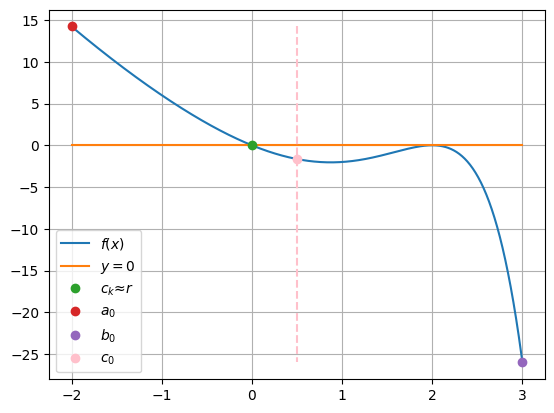

In [99]:
def bisection(f, a, b, tol=1.0e-6, max_iter = 100, verbose=True):
    """
        bisection(f, a, b, tol=1e-6, maxiter=100)
    
    Solve the scalar equation f(x) = 0 by bisection.
    
    Input:
        f    - the function
        a, b - the interval
    Optional (keyword arguments)
        tol  - (`1.0e-6`) a tolerance when to stop due to a small intervall
        max_iter - (`100`) a maximal number of iterations
        verbose - (`True`) activates printing if set to true
    Output:
        r, k - the found root and the number of iterations needed
               to get to this point
    """
    fa = f(a)
    fb = f(b)
    if fa*fb > 0:
        print('Error: f(a)*f(b)>0, there may be no root in the interval.')
        return 0, 0
    for k in range(max_iter):
        c = (a + b) / 2       # The midpoint
        fc = f(c)             # function value in the middle point     
        verbose and print('k={:3d}, a={:.6f}, b={:.6f}, c={:10.6f}, f(c)={:10.3e}'.format(k, a, b, c, fc)) 
        
        # Check here the 4 cases:
        # - f(c) is close to the solution given the tolerance, break the loop and output the result
        # - the interval length (b-a) is small enough that the solution must be inside this: break the loop and output the result
        # - the solution is on one side (a,c): split the interval and proceed further
        # - the solution is on the other side (c,b): split the other interval and proceed further

        # TO COMPLETE
        if abs(fc) < 10e-16: # If the function value is at close to machine precision, break the loop
            break
        elif abs(b-a) < 2*tol: # If the interval is small enough, break the loop
            break
        elif f(a)*f(c) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
            
    return c, k  # solution and number of iteration, i.e. intervals splitting

a, b = -2, 3   # define the interval
c, nit = bisection(f,a,b,tol=1.e-3,max_iter=13)
x=np.linspace(a,b,1000)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, 0*x, label='$y=0$')
plt.plot(c, f(c), 'o', label='$c_k ≈ r$')
plt.plot(a, f(a), 'o', label='$a_0$')
plt.plot(b, f(b), 'o', label='$b_0$')
c_0 = (a+b)/2
plt.plot(c_0, f(c_0), 'o', label='$c_0$', color='pink')
# Plot a vertical line at c_0
plt.plot([c_0, c_0], [f(a), f(b)], '--', color='pink')
plt.legend()
plt.grid()
plt.savefig("BisectionMethod-problem1",dpi = 200)

## 2b)

In [100]:
def g(x):
    return cos(exp(-x))**2/4

def dg(x):
    return 0.5 * exp(-x) * sin(exp(-x)) * cos(exp(-x))
x = 0
x_old = 1
k = 0
vals = []
while abs(x_old - x) > 1e-6:
    x_old = x
    x = g(x)
    vals.append(x)
    print(x, f'k={k}')
    k+=1
print(f'Max value: {max(dg(np.array(vals)))}')

0.07298164543160722 k=0
0.0894429377367279 k=1
0.09309637250723037 k=2
0.09390315315694592 k=3
0.09408110316035628 k=4
0.0941203429131523 k=5
0.0941289951671245 k=6
0.09413090294004815 k=7
0.09413132359196591 k=8
Max value: 0.2228036000778768


An a posteriori estimate of the error is defined by:
\begin{align}
    e_{k+1} \leq \frac{L}{1-L} \times \|x_{k+1}-x_k\|
\end{align}
where $L = \max_{x \in [a,b]} \| g'(x) \| = 0.2228036000778768$

\begin{align}
    e_{8} \leq \frac{0.2228036000778768}{1-0.2228036000778768} \times \|0.09413132359196591-0.09413090294004815\| \\
\end{align}

$$
 \underline{\underline{e_{8} \leq 1.2059083350 \times 10^{-7}}}
$$ 

## 3b)
Consider the function
\begin{align*}
    f(x)=\cos(x)-\sqrt{x},
\end{align*}
    	we want to find the root of $f(x)$.

In [110]:
def newton(f, df, x0, tol=1.e-8, max_iter=30, verbose=True):
    """
        newton(f, df, x0, tol=1.e-8, max_iter=30, verbose=True):
    
    Solve $f(x) = 0$ by Newtons method.
    
    Input:
        f    - the function f
        df   - the derivative of f
        x0   - initial value
    Optional (keyword) parameters
        tol      - (`1.0e-8`) a tolerance when to stop
        max_iter - (`30`) the maximal number of iterations
        verbose  - (`True`) prints the iterates if set to true
    Output:
        x, k - the found root and the number of iterations needed
               to get to this point
    """
    x = x0
    verbose and print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        # TO COMPLETE

        # check if the tolerance criteria is satisfied
        if abs(fx) < 1e-16: # If the function value is at close to machine precision, break the loop
            break
        dx = -fx/df(x)
        if abs(dx) < tol:
            break
        
        # update the value of x
        x += dx

        verbose and print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1 if k < max_iter else "Max iterations reached"

In [111]:
def f(x):
    return cos(x) - sqrt(x)

def df(x):
    return -sin(x) - (1/2)*sqrt(x)

In [112]:
sol, iter = newton(f,df,x0=1,tol=1.e-3)

print("\n The solution: {:.4f}".format(sol), "has been achieved in: {:d}".format(iter), " iterations")

k =  0, x =  1.000000000000000, f(x) = -4.597e-01
k =  1, x =  0.657318198203377, f(x) = -1.912e-02
k =  2, x =  0.638508174374280, f(x) =  3.919e-03
k =  3, x =  0.642444474317021, f(x) = -8.928e-04

 The solution: 0.6424 has been achieved in: 4  iterations


## 4a)

The method that is supposed to be implemented looks like Newtons method


In [115]:

x = 0.5
err = abs(cos(x)+log(x))
while err > 1e-6:
    dx = -(cos(x)+log(x))/(-sin(x)+1/x)
    x += dx # prev: x += -dx which is wrong
    err = abs(dx)
print(x)

0.39774847595805174


## 4b)
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{cos(x) + log(x)}{\frac{1}{x} - sin(x)}
$$
where
$$
dx = - \frac{cos(x) + log(x)}{\frac{1}{x} - sin(x)}
$$

## 4c)

The error lies on the line
```python
x += -dx
```

we already have that 
$$
dx = - \frac{cos(x) + log(x)}{\frac{1}{x} - sin(x)}
$$
so it should only be
```python
x += dx
```
